In [2]:
# 풀 패키지
!pip install opencv-contrib-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 26.4 MB/s eta 0:00:0000:0100:01m


In [2]:
import cv2
# 객체 탐지하기 위한 별도의 라이브러리
cv2.__version__

'4.11.0'

In [2]:
# cv2 자체가 가지고 있는 이미지 출력 기능

# imread(경로)
img = cv2.imread('./data/pets.jpg')

# opencv 이미지 출력 기능
cv2.imshow('pet', img) # 창 이름
cv2.waitKey(0) # 대기시간 0 : 무한대기 // 지정된 시간동안 사용자 키 입력 대기
cv2.destroyAllWindows() # 모든 창 닫기

In [3]:
img_color = cv2.imread('./data/pets.jpg', cv2.IMREAD_COLOR) # 컬러
img_gray = cv2.imread('./data/pets.jpg', cv2.IMREAD_GRAYSCALE) # 흑백
img_unchanged = cv2.imread('./data/pets.jpg', cv2.IMREAD_UNCHANGED) # 원본

# opencv 이미지 출력
cv2.imshow('color', img_color)
cv2.imshow('gray', img_gray)
cv2.imshow('unchange', img_unchanged)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# 이미지 형태(크기) 확인
print('color:', img_color.shape)
print('gray:', img_gray.shape)
print('unchanged:', img_unchanged.shape)

# 행(세로, y축), 열(가로, x축), 채널

color: (427, 640, 3)
gray: (427, 640)
unchanged: (427, 640, 3)


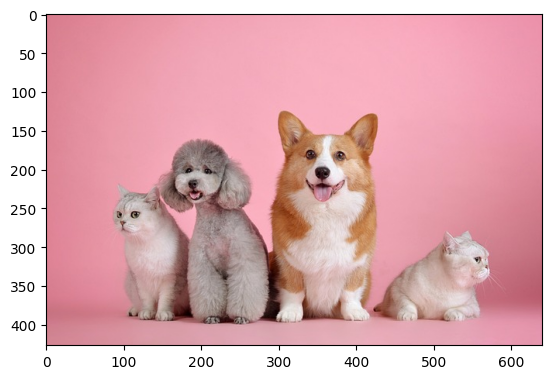

In [7]:
import  matplotlib.pyplot as plt
img = cv2.imread('./data/pets.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

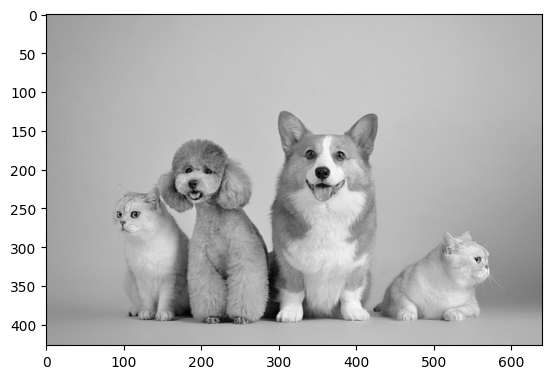

In [9]:
img = cv2.imread('./data/pets.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')
plt.show()

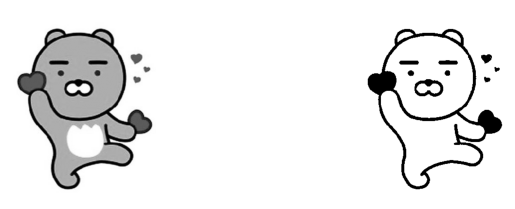

In [14]:
# 흑백 이미지로 읽어오기
img = cv2.imread('./data/ryan.jpg', cv2.IMREAD_GRAYSCALE)
# 불러온 시점에서 RGB값 없음

# 이미지 이진화
# 임계값을 담ㅇ르 변수, 변형된 이미지가 담길 변수 = cv2.threshold(대상, 임계값(기준값), 값, 이진화종류값)
_, thr_img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

# plt.subplot(행, 열, 순서)
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(thr_img, cmap='gray')

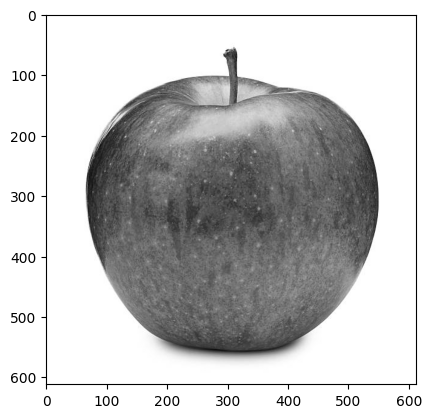

In [20]:
apple = cv2.imread('./data/apple.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(apple, cmap='gray')
plt.show()

In [22]:
# 컬러로 가져온 후 흑백 사진으로 변환
apple = cv2.imread('./data/apple.jpg', cv2.IMREAD_COLOR)
apple_gray = cv2.cvtColor(apple, cv2.COLOR_BGR2GRAY)

153 153
459 459
(306, 306)


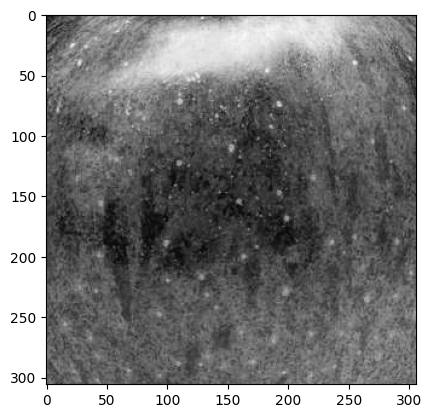

In [39]:
height, width = apple_gray.shape
center_x, center_y = width//2, height//2

# 정사각형 영역 접근
# 좌상단 좌표
top_x, top_y = center_x//2, center_y//2
print(top_x, top_y)

# 우 하단 좌표
bottom_x = center_x + top_x
bottom_y = center_y + top_y
print(bottom_x, bottom_y)

# 사각형 영역 추출하기 - 배열 슬라이싱
# 배열[ 행의 범위, 열의 범위]
rect_region = apple_gray[top_x : bottom_y, top_x : bottom_x]
print(rect_region.shape)

plt.imshow(rect_region, cmap='gray')
plt.show()

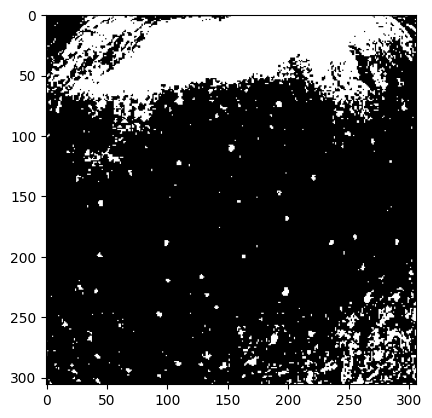

In [41]:
# 이진화 변형해보기 - otsu
val, apple_bin = cv2.threshold(rect_region, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(apple_bin, cmap='gray')
plt.show()

In [42]:
# 원본 이미지에 이진화 변형 이미지 대입
# 복사 먼저 진행

In [44]:
apple2 = apple_gray.copy()

apple2[top_x : bottom_y, top_x : bottom_x] = apple_bin

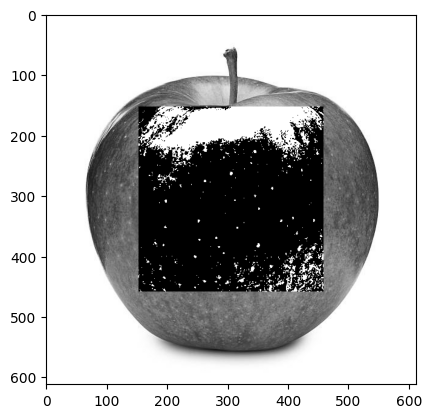

In [47]:
plt.imshow(apple2, cmap='gray')
plt.show()